## [일반과제] 데이터 결합 및 시각화
### 20181061 전하영
-------------------

수업시간에 다룬 공공데이터 처리과정 (정제, 테이블 합치기, 신규 필드 생성, 상관계수 구하기, 시각화(산정도, pairplot, heatmap 등))을 자신이 선택한 데이터셋을 대상으로 수행한다

데이터 공개 사이트들(공공데이터포털/서울시열린광장/캐글/데이콘 등)에서 자신이 처리하고 싶은 데이터를 골라 최소 3개이상의 엑셀(or CSV or txt)를 조합하여 처리 분석하며, 각 처리단계별로 자신이 이해한 설명을 주석으로 기재한다

3가지 파일을 엮을 수 있도록 정한 주제는 
**서울특별시 자치구별 인구수 대비 확진률과 검사가능 선별진료소 를 시각화** 
이다

사용한 데이터 출처는 아래와 같다 
- 서울특별시 코로나19 확진자 현황 : https://www.data.go.kr/data/15063273/fileData.do
- 보건복지부 코로나19 선별진료소 현황 : https://www.data.go.kr/data/15043131/fileData.do
- 서울특별시 자치구별 주민등록인구 통계 : https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

### 필요한 라이브러리 import 하기
구현에 필요한 라이브러리를 import 해온다.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt

이전 과제에서 사용하지 않은, 새롭게 추가된 라이브러리는 1가지다
- matplotlib는 파이썬에서 자료를 차트나 플롯으로 시각화하는 패키지 이다.
수업시간에서 배운 Seaborn(sns)는 차트를 만드는 것이 익숙해지면 추후에 사용해 볼 예정이다.

### 서울시 인구 데이터 불러오기
우선, 서울시열린데이터광장에서 다운로드 받은 2021년 기준 서울특별시 자치구별 주민등록 인구 정보를 가져온다. pandas를 사용하여 불러온다. 불러오는 과정은 강의자료를 참고하였다.


In [141]:
pop_seoul = pd.read_csv("report 2021.txt",encoding='utf-8',delimiter="\t")
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020,합계,"4,417,954","9,911,088","4,816,522","5,094,566","9,668,465","4,701,723","4,966,742","242,623","114,799","127,824",2.19,"1,568,331"
3,2020,종로구,"75,003","158,996","76,876","82,120","149,384","72,635","76,749","9,612","4,241","5,371",1.99,"28,507"
4,2020,중구,"63,686","134,635","65,776","68,859","125,240","61,222","64,018","9,395","4,554","4,841",1.97,"24,495"


우선 원래의 csv파일의 컬럼 정보를 확인한다. 
txt 파일도 `read_csv()` 함수로 불러오기가 가능하다.
컬럼이 `\t` 기호로 구분되어 있기 때문에 `delimiter="\t"` 를 사용해주면 csv처럼 불러올 수 있다.

이 데이터에서 우리가 분석에 사용할 컬럼은 자치구, 인구합계 이정도이다. 그 외의 데이터는 필요하지 않으니 특정 컬럼 데이터들을 삭제해준다

In [142]:
pop_seoul = pop_seoul.drop(['기간','세대','인구.1','인구.2','인구.3','인구.4','인구.5','인구.6','인구.7','인구.8','세대당인구','65세이상고령자'],axis=1)

제거 결과가 pop_seoul에 잘 저장되었는지 확인한다

In [143]:
pop_seoul.head()

,자치구,인구
0,자치구,합계
1,자치구,계
2,합계,"9,911,088"
3,종로구,"158,996"
4,중구,"134,635"


컬럼명을 자치구를 자치구로, 인구는 인구수로 변경한다. 0번째 행과 1번째 행을 필요가 없으니 삭제하도록 한다. 

In [144]:
pop_seoul.drop(pop_seoul.index[[0,1]],inplace=True)
pop_seoul.rename(columns={'인구':'인구수'},inplace=True)
pop_seoul.head()

,자치구,인구수
2,합계,"9,911,088"
3,종로구,"158,996"
4,중구,"134,635"
5,용산구,"244,645"
6,성동구,"300,505"


0번째, 1번째 인덱스를 삭제하였기에 시작 인덱스가 2다. 거슬리긴 하지만, 데이터 분석에 별다른 문제는 없을 듯 하니 넘어간다.

### 서울시 코로나19 확진자 현황 데이터 불러오기
다운로드 받은 서울시 코로나19 확진자 현황 데이터를 가져온다. pandas를 사용하여 불러오며, 필요한 데이터만 사용할 수 있도록 가공한다

In [39]:
confirmed_cases= pd.read_csv("Seoul Confirmed Cases.csv",encoding='utf-8')
confirmed_cases.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,35628,2021-04-18,NaN,NaN,NaN,강동구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-04-19 10:40,2021-04-19 10:40,Y
1,35627,2021-04-18,NaN,NaN,NaN,마포구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-04-19 10:40,2021-04-19 10:40,Y
2,35626,2021-04-18,NaN,NaN,NaN,양천구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-04-19 10:40,2021-04-19 10:40,Y
3,35625,2021-04-18,NaN,NaN,NaN,송파구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-04-19 10:40,2021-04-19 10:40,Y
4,35624,2021-04-18,NaN,NaN,NaN,광진구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-04-19 10:40,2021-04-19 10:40,Y


다운로드 받은 csv 파일을 그냥 사용하려하니 코덱 문제가 발생하였다. 이를 해결하기 위해 기존에 다운로드 받은 csv 파일을 쉼표로분리, UTF-8, csv 파일로 다시 저장하고 불러오기 하였다.

최근에는 확진자 개인정보 보호를 철저하게 하고 있으므로, 주어지지 않는 `NqN` 데이터가 많다. NaN이 포함된 필요하지 않은 컬럼들을 몇개 제거한다.

그 전에 데이터에 결손치가 얼마나 있는지 확인해본다

In [40]:
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35628 entries, 0 to 35627
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      35628 non-null  int64  
 1   확진일     35628 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      35628 non-null  object 
 6   여행력     1051 non-null   object 
 7   접촉력     35628 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      32879 non-null  object 
 10  이동경로    0 non-null      float64
 11  등록일     35628 non-null  object 
 12  수정일     35628 non-null  object 
 13  노출여부    35628 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 3.8+ MB


In [41]:
confirmed_cases.isnull().sum()

연번          0
확진일         0
환자번호    35628
국적      35628
환자정보    35628
지역          0
여행력     34577
접촉력         0
조치사항    35628
상태       2749
이동경로    35628
등록일         0
수정일         0
노출여부        0
dtype: int64

In [43]:
confirmed_cases=confirmed_cases.drop(['연번','확진일','환자번호','여행력','접촉력','조치사항','상태','국적','노출여부','수정일','등록일','이동경로'],axis=1)
confirmed_cases.head()

,환자정보,지역
0,NaN,강동구
1,NaN,마포구
2,NaN,양천구
3,NaN,송파구
4,NaN,광진구


필요하지 않은 환자정보도 제거한다.

In [44]:
confirmed_cases = confirmed_cases.drop(['환자정보'],axis=1)

In [45]:
confirmed_cases.head()

,지역
0,강동구
1,마포구
2,양천구
3,송파구
4,광진구


In [46]:
confirmed_cases.isnull().sum()

지역    0
dtype: int64

지역 값에는 더이상 결손치가 없다.
헤더에서 지역을 자치구로 변경해준다.


In [47]:
confirmed_cases.rename(columns={'지역':'자치구'},inplace=True)
confirmed_cases.head()

,자치구
0,강동구
1,마포구
2,양천구
3,송파구
4,광진구


이제 해야할 일은 위 데이터를 자치구 별 확진자수로 데이터 프레임 모양을 변경하여야 한다.
https://t1.daumcdn.net/cfile/tistory/9978503F5B8264490F
를 참고하여 `groupby()` 와 `apply` `combine` 등의 개념을 사용하였다.

In [49]:
sum_confirmed_cases = confirmed_cases.groupby(confirmed_cases['자치구']).sum()

In [50]:
sum_confirmed_cases.head()

""
자치구
강남구
강남구
강동구
강북구
강북구


뭔가 잘못된 듯 하다. 합계를 해줄 숫자가 없으니 합계도 나오지 않는 것이다. 
`확진자수` 라는 컬럼을 하나 추가한 후 각 컬럼에 1을 추가해보겠다. 다행히 다른 변수에 저장해 두었기에 원본 데이터프레임은 손상되지 않았다.

In [51]:
confirmed_cases['확진자수']=1
confirmed_cases.head()

,자치구,확진자수
0,강동구,1
1,마포구,1
2,양천구,1
3,송파구,1
4,광진구,1


잘 추가되었다. 이를 이제 다시 `groupby()` 시도해보겠다.

In [172]:
sum_confirmed_cases = confirmed_cases.groupby(confirmed_cases['자치구']).sum()
sum_confirmed_cases.head()

,확진자수
자치구,
강남구,1754
강남구,3
강동구,1310
강북구,923
강북구,2


합계가 정상적으로 이루어졌다!

우리는 여기서 서울시에 대해서만 통계를 낼것이니 `타시도` 확진자는 제거한다.

In [173]:
sum_confirmed_cases.drop(sum_confirmed_cases.index[-1],inplace=True)
sum_confirmed_cases.tail()

,확진자수
자치구,
은평구,1
종로구,652
중구,555
중구,3
중랑구,1577


중복되는 데이터를 제거한다. 적은 숫자의 데이터는 해외유입 확진자이므로 제거하도록 한다. 
`ssum_confirmed_cases.drop(sum_confirmed_cases.index[1])` 이런 문법으로 진행하였으며, 코드가 길어져 밑으로 쭉 내려가길 바란다.

In [174]:
sum_confirmed_cases

,확진자수
자치구,
강남구,1754
강남구,3
강동구,1310
강북구,923
강북구,2
강서구,1915
관악구,1689
광진구,1126
광진구,1


In [175]:
sum_confirmed_cases=sum_confirmed_cases.drop([sum_confirmed_cases.index[1],sum_confirmed_cases.index[4],sum_confirmed_cases.index[8],sum_confirmed_cases.index[11],sum_confirmed_cases.index[21],sum_confirmed_cases.index[27],sum_confirmed_cases.index[30]])
sum_confirmed_cases

,확진자수
자치구,
강남구,1754
강동구,1310
강북구,923
강서구,1915
관악구,1689
광진구,1126
구로구,1259
금천구,541
노원구,1579


In [176]:
sum_confirmed_cases.tail()

,확진자수
자치구,
용산구,950
은평구,1586
종로구,652
중구,555
중랑구,1577


### 전국 코로나19 선별진료소 현황 데이터 불러오기
다음은, 보건복지부 사이트에서 다운받은 전국 코로나 19 선별진료소 현황 csv 데이터를 불러온다

In [156]:
selective_care_center = pd.read_excel("선별진료소_현황.xls")
selective_care_center.head()

,기준일,검체채취\n가능여부,시도,시군구,의료기관명,주소,평일 운영시간,토요일 운영시간,일요일/공휴일\n운영시간,대표 전화번호
0,2021년 04월 18일 21시,○,서울,강남구,강남구보건소,서울 강남구 삼성동(삼성2동) 8 강남구보건소,09:00 ~ 20:00,09:00 ~ 18:00,09:00 ~ 18:00,02-3423-5555
1,2021년 04월 18일 21시,○,서울,강남구,삼성서울병원,서울 강남구 일원로81 삼성서울병원,00:00 ~ 24:00,00:00 ~ 24:00,00:00 ~ 24:00,02-3410-0543
2,2021년 04월 18일 21시,○,서울,강남구,강남세브란스병원,서울 강남구 언주로211 강남세브란스병원,09:00 ~ 17:00,09:00 ~ 12:30,미운영,02-1599-6114
3,2021년 04월 18일 21시,○,서울,강동구,강동구보건소,서울 강동구 성내동 541-2,09:00 ~ 18:00,09:00 ~ 16:00,09:00 ~ 16:00,02-3425-6713
4,2021년 04월 18일 21시,○,서울,강동구,중앙보훈병원,서울 강동구 진황도로 61길 53,09:00 ~ 17:30,미운영,미운영,02-2225-1114


데이터의 정보를 먼저 확인해준다. 결손치 및 데이터타입 등을 파악한다.

In [157]:
selective_care_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   기준일           627 non-null    object
 1   검체채취
가능여부     627 non-null    object
 2   시도            627 non-null    object
 3   시군구           627 non-null    object
 4   의료기관명         627 non-null    object
 5   주소            627 non-null    object
 6   평일 운영시간       627 non-null    object
 7   토요일 운영시간      627 non-null    object
 8   일요일/공휴일
운영시간  627 non-null    object
 9   대표 전화번호       627 non-null    object
dtypes: object(10)
memory usage: 49.1+ KB


In [158]:
selective_care_center.describe()

,기준일,검체채취\n가능여부,시도,시군구,의료기관명,주소,평일 운영시간,토요일 운영시간,일요일/공휴일\n운영시간,대표 전화번호
count,627,627,627,627,627,627,627,627,627,627
unique,1,1,17,208,622,627,72,77,54,624
top,2021년 04월 18일 21시,○,경기,서구,영동병원,충청남도 당진시 채운동 1040,09:00 ~ 18:00,09:00 ~ 18:00,미운영,063-281-6341
freq,627,627,110,18,2,1,175,109,242,2


In [159]:
selective_care_center.isnull().sum()

기준일              0
검체채취\n가능여부       0
시도               0
시군구              0
의료기관명            0
주소               0
평일 운영시간          0
토요일 운영시간         0
일요일/공휴일\n운영시간    0
대표 전화번호          0
dtype: int64

.. 결손치는 없는 듯 하다
만들고자 하는 데이터는 서울 특별시에 있는 자치구 별 선별진료소의 수 이다.
이 데이터는 전국 데이터를 포함하고 있으므로 서울특별시를 제외한 행은 모두 삭제해주어야 한다.
`시도` 컬럼 에서 `서울`이 아닌 모든 행을 제거한다.

In [160]:
selective_care_center=selective_care_center[selective_care_center['시도'] == '서울'] 
selective_care_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   기준일           72 non-null     object
 1   검체채취
가능여부     72 non-null     object
 2   시도            72 non-null     object
 3   시군구           72 non-null     object
 4   의료기관명         72 non-null     object
 5   주소            72 non-null     object
 6   평일 운영시간       72 non-null     object
 7   토요일 운영시간      72 non-null     object
 8   일요일/공휴일
운영시간  72 non-null     object
 9   대표 전화번호       72 non-null     object
dtypes: object(10)
memory usage: 6.2+ KB


개체의 수가 627개에서 71개로 줄어들었다. 즉, 서울이 아닌 데이터는 모두 삭제되었다는 것이다.
이제 사용하지 않는 열을 삭제한다

In [161]:
selective_care_center = selective_care_center.drop(['기준일','검체채취\n가능여부','시도','의료기관명','주소','평일 운영시간','토요일 운영시간','일요일/공휴일\n운영시간','대표 전화번호'],axis=1)
selective_care_center.head()

,시군구
0,강남구
1,강남구
2,강남구
3,강동구
4,강동구


이전처럼 데이터 처리를 해준다.

In [162]:
selective_care_center.rename(columns={'시군구':'자치구'},inplace=True)
selective_care_center['선별진료소개수']=1
sum_selective_care_center = selective_care_center.groupby(selective_care_center['자치구']).sum()
sum_selective_care_center.head()

,선별진료소개수
자치구,
강남구,3
강동구,4
강북구,1
강서구,1
관악구,3


이전 확진자 데이터 정리 했을 때 처럼 깔끔하게 정리되었다.

### 테이블 병합 및 데이터 분석
이제 정리한 데이터들을 분석할 차례다.
데이터를 포함한 테이블을 병합한 후 분석 용 컬럼을 추가하여 분석해볼예정이다.

우선, 이전에 만든 테이블들을 병합한 후 정제한다

막상 그냥 병합하려니 문제가 생긴다. 값을 자치구 기준으로 사전순으로 행 정렬을 해주어야 할 듯하다. 그리고 인구 총합은 필요없으니 그것도 제거해준다


In [145]:
pop_seoul=pop_seoul.drop(pop_seoul.index[0])
pop_seoul.head()

,자치구,인구수
3,종로구,"158,996"
4,중구,"134,635"
5,용산구,"244,645"
6,성동구,"300,505"
7,광진구,"360,109"


다른데이터와는 다르게 index가 설정되어 있지 않다. 이 또한 세팅해준다

In [152]:
pop_seoul = pop_seoul.set_index('자치구')
pop_seoul.head()

,인구수
자치구,
강남구,"544,055"
강동구,"463,998"
강북구,"311,569"
강서구,"585,901"
관악구,"509,803"


데이터 상태를 다시 확인해준다

In [154]:
pop_seoul

,인구수
자치구,
강남구,"544,055"
강동구,"463,998"
강북구,"311,569"
강서구,"585,901"
관악구,"509,803"
광진구,"360,109"
구로구,"432,488"
금천구,"247,835"
노원구,"527,032"


In [164]:
sum_selective_care_center

,선별진료소개수
자치구,
강남구,3
강동구,4
강북구,1
강서구,1
관악구,3
광진구,3
구로구,3
금천구,2
노원구,3


In [180]:
sum_confirmed_cases

,확진자수
자치구,
강남구,1754
강동구,1310
강북구,923
강서구,1915
관악구,1689
광진구,1126
구로구,1259
금천구,541
노원구,1579


제대로 확인되었으니 차근차근 병합해보겠다.

In [184]:
test = pd.merge(pop_seoul, sum_selective_care_center, left_index=True, right_index=True, how='outer')


In [185]:
test.head()

,인구수,선별진료소개수
자치구,,
강남구,"544,055",3
강동구,"463,998",4
강북구,"311,569",1
강서구,"585,901",1
관악구,"509,803",3


In [186]:
result = pd.merge(test, sum_confirmed_cases, left_index=True, right_index=True, how='outer')
result

,인구수,선별진료소개수,확진자수
자치구,,,
강남구,"544,055",3,1754
강동구,"463,998",4,1310
강북구,"311,569",1,923
강서구,"585,901",1,1915
관악구,"509,803",3,1689
광진구,"360,109",3,1126
구로구,"432,488",3,1259
금천구,"247,835",2,541
노원구,"527,032",3,1579


드디어 병합 모든 과정을 마쳤다.

#### 분석과정 

이제 알고자 하는 결과 값을 컬럼으로 추가해보겠다.

In [188]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   인구수      25 non-null     object
 1   선별진료소개수  25 non-null     int64 
 2   확진자수     25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


In [201]:
result['인구수'] = result['인구수'].astype(str).str.replace(',', '').astype(int)

result['확진률']=result['확진자수'] / result['인구수']* 100
result['선별진료소당 평균 검사수용인원']=result['인구수'] // result['선별진료소개수']
result.head()

,인구수,선별진료소개수,확진자수,확진률,선별진료소당 평균 검사수용인원
자치구,,,,,
강남구,544055,3,1754,0.322394,181351
강동구,463998,4,1310,0.282329,115999
강북구,311569,1,923,0.296243,311569
강서구,585901,1,1915,0.326847,585901
관악구,509803,3,1689,0.331304,169934


In [202]:
result['서울전체 대비 확진률']=result['확진자수'] / (result['인구수'].sum()) * 100
result.head()

,인구수,선별진료소개수,확진자수,확진률,선별진료소당 평균 검사수용인원,서울전체 대비 확진률
자치구,,,,,,
강남구,544055,3,1754,0.322394,181351,0.017697
강동구,463998,4,1310,0.282329,115999,0.013218
강북구,311569,1,923,0.296243,311569,0.009313
강서구,585901,1,1915,0.326847,585901,0.019322
관악구,509803,3,1689,0.331304,169934,0.017042


In [203]:
result.sort_values(by="확진률",ascending=False).head()

,인구수,선별진료소개수,확진자수,확진률,선별진료소당 평균 검사수용인원,서울전체 대비 확진률
자치구,,,,,,
중구,134635,3,555,0.412226,44878,0.005600
종로구,158996,3,652,0.410073,52998,0.006578
중랑구,399562,3,1577,0.394682,133187,0.015911
용산구,244645,2,950,0.388318,122322,0.009585
동작구,401572,3,1520,0.378512,133857,0.015336


3가지의 데이터 컬럼을 추가하였다.
- 자치구 인구수 대비 자치구 확진률
- 서울 전체 인구수 대비 자치구 확진률
- 자치수 선별 진료소 당 평균 검사 수용 인원

이를 바탕으로 데이터 시각화를 해보겠다

### 데이터 시각화
matplotlib를 이용해 지금까지 얻은 자료를 시각화 해 볼것이다

In [204]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system() == "Windows":
    path="c:/Windows/Fonts/malgun.ttf"
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc("font",family=font_name)


처음에 가져온 라이브러리 말고도 필요한 라이브러리를 가져온다.
강의자료를 참고하였으며, 폰트 세팅 과정인 듯 하다.

In [205]:
result.head()

,인구수,선별진료소개수,확진자수,확진률,선별진료소당 평균 검사수용인원,서울전체 대비 확진률
자치구,,,,,,
강남구,544055,3,1754,0.322394,181351,0.017697
강동구,463998,4,1310,0.282329,115999,0.013218
강북구,311569,1,923,0.296243,311569,0.009313
강서구,585901,1,1915,0.326847,585901,0.019322
관악구,509803,3,1689,0.331304,169934,0.017042


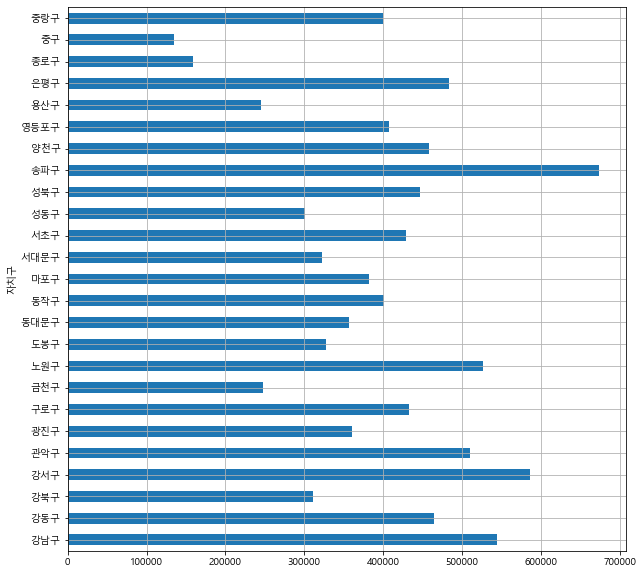

In [206]:
plt.figure()
result['인구수'].plot(kind='barh',grid=True,figsize=(10,10))
plt.show()
%matplotlib inline

잘 작동하는지 확인차 자치구 별 인구수를 나타내보았다. 

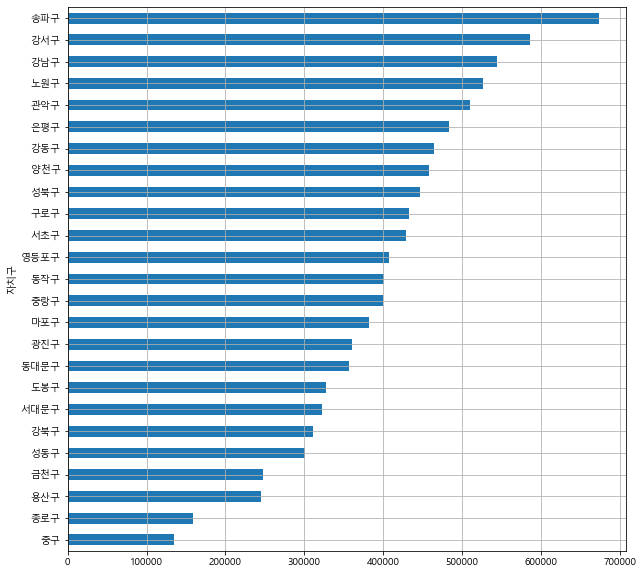

In [207]:
plt.figure()
result['인구수'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()
%matplotlib inline

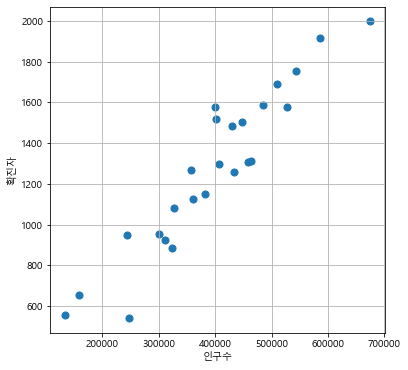

In [210]:
plt.figure(figsize=(6,6))
plt.scatter(result['인구수'],result['확진자수'],s=50)
plt.xlabel('인구수')
plt.ylabel('확진자')
plt.grid()
plt.show()
%matplotlib inline

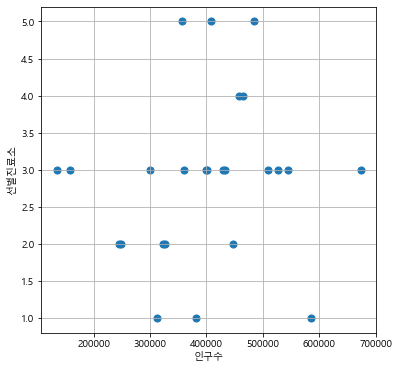

In [211]:
plt.figure(figsize=(6,6))
plt.scatter(result['인구수'],result['선별진료소개수'],s=50)
plt.xlabel('인구수')
plt.ylabel('선별진료소')
plt.grid()
plt.show()
%matplotlib inline

#### 자료 다듬기
강의자료에 따라 오차를 분석하여 인구수 대비 확진자 데이터를 시각화 해보겠다

In [214]:
fp1 = np.polyfit(result['인구수'],result['확진자수'],1)
f1=np.poly1d(fp1)
fx=np.linspace(100000,70000,100)
result['오차']=np.abs(result['확진자수'],f1(result['인구수']))

df_sort=result.sort_values(by="오차",ascending=False)
df_sort.head()

,인구수,선별진료소개수,확진자수,확진률,선별진료소당 평균 검사수용인원,서울전체 대비 확진률,오차
자치구,,,,,,,
송파구,673926,3,1997,0.296323,224642,0.020149,1997.0
강서구,585901,1,1915,0.326847,585901,0.019322,1915.0
강남구,544055,3,1754,0.322394,181351,0.017697,1754.0
관악구,509803,3,1689,0.331304,169934,0.017042,1689.0
은평구,484043,5,1586,0.327657,96808,0.016002,1586.0


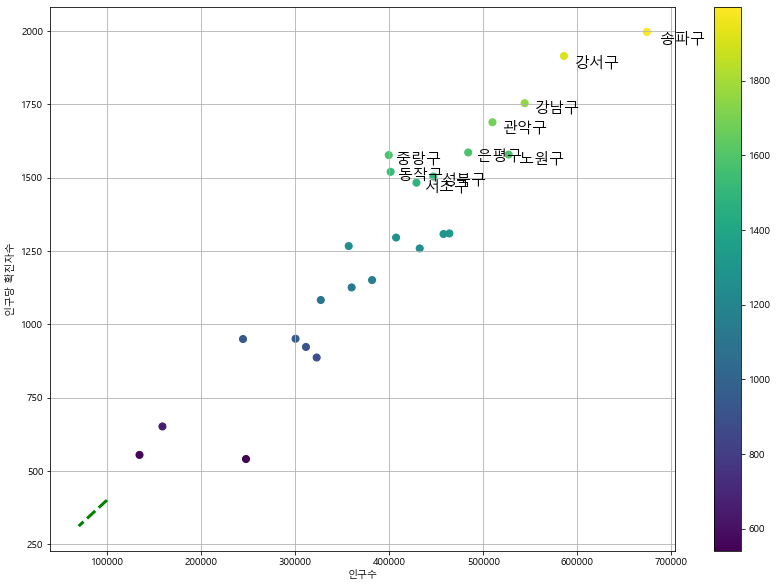

In [216]:
plt.figure(figsize=(14,10))
plt.scatter(result['인구수'],result['확진자수'],c=result['오차'],s=50)
plt.plot(fx,f1(fx),ls="dashed",lw=3,color="g")

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02,df_sort['확진자수'][n]*0.98,df_sort.index[n],fontsize=15)
plt.xlabel("인구수")
plt.ylabel("인구당 확진자수")
plt.colorbar()
plt.grid()
plt.show()
%matplotlib inline

오차를 나타내는 초록색 선이 제대로 그려진 것 같진 않다 ....

이렇게 과제를 하면서 matplotlib 및 판다스 사용하기에 많이 익숙해 진 듯 하다

나중에 데이터 시각화 할일이 있을 땐 seaborn 으로 더 예쁘게 출력해보고 싶다.

